<a href="https://colab.research.google.com/github/Amara-4312/CDC-predictive-modeling-2015/blob/main/CDC_DATA_CLEANING_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

In [ ]:
file_path = "LLCP2015.XPT"

In [ ]:
df = pd.read_sas(file_path, format="xport", encoding="utf-8")

print("✅ Dataset loaded successfully!")

/tmp/ipython-input-1250331770.py:1: UserWarning: xport file may be corrupted.
  df = pd.read_sas(file_path, format="xport", encoding="utf-8")


✅ Dataset loaded successfully!


In [ ]:
print("Shape:", df.shape)
print("Columns:", len(df.columns))

Shape: (14678, 330)
Columns: 330


In [ ]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,01292015,01,29,2015,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,,,3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,5.39

In [ ]:
# =========================
# Step 2 — Normalize column names & quick audit
# =========================
df = df.copy()
df.columns = [str(c).strip() for c in df.columns]  # keep original case (BRFSS is case-sensitive in docs)

print("Rows:", len(df), " | Cols:", len(df.columns))
df.info(memory_usage="deep")


Rows: 14678  | Cols: 330
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14678 entries, 0 to 14677
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 41.2 MB


In [ ]:
# =========================
# Step 3 — Replace BRFSS special codes with NaN (numeric columns)
#   Common BRFSS special codes: 7/9 (DK/Refused), 77/88/99, 777/888/999, etc.
# =========================
SPECIAL_CODES = {7, 8, 9, 77, 88, 99, 777, 888, 999, 7777, 8888, 9999, 77777, 88888, 99999}

def replace_special_codes(frame: pd.DataFrame) -> pd.DataFrame:
    out = frame.copy()
    num_cols = out.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        # Only replace in integer-like columns; float NaNs are OK.
        # Use where to keep performance decent.
        s = out[col]
        mask = s.isin(SPECIAL_CODES)
        if mask.any():
            out.loc[mask, col] = np.nan
    return out

df = replace_special_codes(df)
print("✅ Special codes replaced (numeric columns).")


✅ Special codes replaced (numeric columns).


In [ ]:
# =========================
# Step 4 — Select key variables (keep only what we need for diabetes risk)
#   This list is safe; we filter to what's present in your file.
# =========================
wanted = [
    # Targets / outcomes
    "DIABETE3",     # Ever told you have diabetes
    "PREDIAB1",     # (Pre)diabetes/borderline told

    # Cardiometabolic risk factors
    "BPHIGH4",      # Ever told high blood pressure
    "BPMEDS",       # Taking BP meds now
    "TOLDHI2",      # Told high cholesterol
    "CHOLCHK",      # Cholesterol checked in last 5 years

    # Anthropometrics
    "_BMI5",        # BMI * 100
    "_BMI5CAT",     # BMI categories

    # Demographics
    "_AGE80", "_AGEG5YR", "_AGE_G", "_AGE65YR",
    "SEX", "EDUCA", "INCOME2", "EMPLOY1", "_STATE",

    # Lifestyle
    "SMOKE100", "SMOKDAY2",        # Smoking
    "DRNKANY5", "ALCDAY5", "MAXDRNKS",  # Alcohol
    "EXERANY2",                     # Any physical activity past month

    # General health
    "GENHLTH", "PHYSHLTH", "MENTHLTH", "POORHLTH",

    # Survey weights (keep for prevalence or weighted analyses)
    "_LLCPWT", "_WT2RAKE", "_RAWRAKE", "_STSTR", "_PSU"
]

present = [c for c in wanted if c in df.columns]
df = df[present].copy()
print(f"✅ Kept {len(present)} / {len(wanted)} variables.")
df.head(3)


✅ Kept 32 / 32 variables.


,DIABETE3,PREDIAB1,BPHIGH4,BPMEDS,TOLDHI2,CHOLCHK,_BMI5,_BMI5CAT,_AGE80,_AGEG5YR,_AGE_G,_AGE65YR,SEX,EDUCA,INCOME2,EMPLOY1,_STATE,SMOKE100,SMOKDAY2,DRNKANY5,ALCDAY5,MAXDRNKS,EXERANY2,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,_LLCPWT,_WT2RAKE,_RAWRAKE,_STSTR,_PSU
0,3.0,3.0,1.0,1.0,1.0,1.0,4018.0,4.0,63.0,NaN,5.0,1.0,2.0,4.0,3.0,NaN,1.0,1.0,3.0,2.0,NaN,NaN,2.0,5.0,15.0,18.0,10.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
1,3.0,3.0,3.0,NaN,2.0,4.0,2509.0,3.0,52.0,NaN,4.0,1.0,2.0,6.0,1.0,3.0,1.0,1.0,1.0,2.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,108.060903,28.781560,1.0,11011.0,2.015000e+09
2,3.0,3.0,3.0,NaN,1.0,1.0,2204.0,2.0,71.0,11.0,6.0,2.0,2.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,15.0,NaN,NaN,255.264797,57.563120,2.0,11011.0,2.015000e+09


In [ ]:
# =========================
# Step 5 — Core recodes / feature standardization
# =========================

# ---- Age (continuous)
if "_AGE80" in df.columns:
    df["_AGE80"] = pd.to_numeric(df["_AGE80"], errors="coerce")
    # Adults only (BRFSS is adult survey anyway)
    df = df[df["_AGE80"].between(18, 80, inclusive="both")]

# ---- BMI: convert _BMI5 to real BMI and sanitize
if "_BMI5" in df.columns:
    df["BMI"] = pd.to_numeric(df["_BMI5"], errors="coerce") / 100.0
    df.loc[~df["BMI"].between(12, 60), "BMI"] = np.nan  # drop extreme outliers
    # Optional: keep category if present
    if "_BMI5CAT" in df.columns:
        # 1=Underweight, 2=Normal, 3=Overweight, 4=Obese (BRFSS convention)
        bmi_map = {1: "Underweight", 2: "Normal", 3: "Overweight", 4: "Obese"}
        df["BMI_cat"] = df["_BMI5CAT"].map(bmi_map)

# ---- Sex
if "SEX" in df.columns:
    df["sex"] = df["SEX"].map({1: "Male", 2: "Female"})

# ---- Education (EDUCA: 1 never… 6 college grad)
if "EDUCA" in df.columns:
    educ_map = {
        1: "Never/Elem",
        2: "Grades 1-8",
        3: "Grades 9-11",
        4: "HS/GED",
        5: "Some college",
        6: "College 4+"
    }
    df["education"] = df["EDUCA"].map(educ_map)

# ---- Income (INCOME2: 1 <10k ... 8 75k+, 77/99 NA already handled)
if "INCOME2" in df.columns:
    income_map = {
        1: "<$10k",
        2: "$10–15k",
        3: "$15–20k",
        4: "$20–25k",
        5: "$25–35k",
        6: "$35–50k",
        7: "$50–75k",
        8: ">= $75k",
    }
    df["income"] = df["INCOME2"].map(income_map)

# ---- Employment (EMPLOY1)
if "EMPLOY1" in df.columns:
    employ_map = {
        1: "Emp. wages",
        2: "Self-emp",
        3: "Out of work >1y",
        4: "Out of work <1y",
        5: "Homemaker",
        6: "Student",
        7: "Retired",
        8: "Unable to work"
    }
    df["employment"] = df["EMPLOY1"].map(employ_map)

# ---- Smoking status
# SMOKE100: 1=Yes, 2=No (100 lifetime cigs)
# SMOKDAY2 among current smokers: 1=Every day, 2=Some days, 3=Not at all
if {"SMOKE100", "SMOKDAY2"}.issubset(df.columns):
    df["ever_100_cigs"] = df["SMOKE100"].map({1: 1, 2: 0})
    df["current_smoker"] = np.where(
        (df["SMOKE100"] == 1) & (df["SMOKDAY2"].isin([1, 2])), 1,
        np.where((df["SMOKE100"] == 1) & (df["SMOKDAY2"] == 3), 0, np.nan)
    )

# ---- Alcohol (simplified)
# DRNKANY5: 1 Yes, 2 No
if "DRNKANY5" in df.columns:
    df["any_alcohol"] = df["DRNKANY5"].map({1: 1, 2: 0})

# ---- Physical activity (EXERANY2: 1 Yes, 2 No)
if "EXERANY2" in df.columns:
    df["any_exercise"] = df["EXERANY2"].map({1: 1, 2: 0})

# ---- Cardiometabolic diagnoses
# BPHIGH4 (ever high BP): 1=Yes, (2=Yes, but during pregnancy — treat as missing here), 3=No
if "BPHIGH4" in df.columns:
    df["ever_high_bp"] = np.where(df["BPHIGH4"] == 1, 1,
                           np.where(df["BPHIGH4"] == 3, 0, np.nan))

# TOLDHI2 (told high cholesterol): 1 Yes, 2 No
if "TOLDHI2" in df.columns:
    df["ever_high_chol"] = df["TOLDHI2"].map({1: 1, 2: 0})

# ---- Diabetes targets
# DIABETE3: 1 Yes, 2 Yes (pregnancy), 3 No, 4 No (not sure/depends by year) → safest: only 1 as diabetics, 3 as non
if "DIABETE3" in df.columns:
    df["diabetes_dx"] = np.where(df["DIABETE3"] == 1, 1,
                          np.where(df["DIABETE3"] == 3, 0, np.nan))

# PREDIAB1: (told prediabetes/borderline). We consider 1/2 as prediabetes; 3 as No.
if "PREDIAB1" in df.columns:
    df["prediabetes_dx"] = np.where(df["PREDIAB1"].isin([1, 2]), 1,
                             np.where(df["PREDIAB1"] == 3, 0, np.nan))


In [ ]:
# =========================
# Step 6 — Rename core analysis columns for clarity
# =========================
rename_map = {
    "_AGE80": "age",
    "SEX": "SEX_raw",
    "_BMI5": "BMI_rawx100",
    "_BMI5CAT": "BMI_cat_raw",
}
df = df.rename(columns=rename_map)

# Ordered subset we'll mainly analyze/model with (keep if present)
final_order = [
    "age", "sex", "education", "income", "employment", "BMI", "BMI_cat",
    "ever_high_bp", "ever_high_chol", "any_exercise", "ever_100_cigs", "current_smoker",
    "any_alcohol",
    "diabetes_dx", "prediabetes_dx",
    # keep weights if present
    "_LLCPWT", "_WT2RAKE", "_RAWRAKE", "_STSTR", "_PSU",
]
final_cols = [c for c in final_order if c in df.columns]
tidy = df[final_cols].copy()

print("Tidy shape:", tidy.shape)
tidy.head(5)


Tidy shape: (14460, 20)


,age,sex,education,income,employment,BMI,BMI_cat,ever_high_bp,ever_high_chol,any_exercise,ever_100_cigs,current_smoker,any_alcohol,diabetes_dx,prediabetes_dx,_LLCPWT,_WT2RAKE,_RAWRAKE,_STSTR,_PSU
0,63.0,Female,HS/GED,$15–20k,NaN,40.18,Obese,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
1,52.0,Female,College 4+,<$10k,Out of work >1y,25.09,Overweight,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,108.060903,28.781560,1.0,11011.0,2.015000e+09
2,71.0,Female,HS/GED,NaN,NaN,22.04,Normal,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,255.264797,57.563120,2.0,11011.0,2.015000e+09
3,63.0,Female,HS/GED,NaN,NaN,28.19,Overweight,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
4,61.0,Female,Some college,NaN,NaN,24.37,Normal,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,258.682223,57.563120,2.0,11011.0,2.015000e+09



Age summary (should be adults 18–80):
count    14460.000000
mean        55.473928
std         16.615644
min         18.000000
25%         44.000000
50%         58.000000
75%         68.000000
max         80.000000
Name: age, dtype: float64

BMI summary:
count    13344.00000
mean        28.33818
std          6.27480
min         12.62000
25%         23.99750
50%         27.37000
75%         31.38000
max         59.81000
Name: BMI, dtype: float64

Diabetes target counts:
diabetes_dx
0.0    11918
1.0     2159
NaN      383
Name: count, dtype: int64


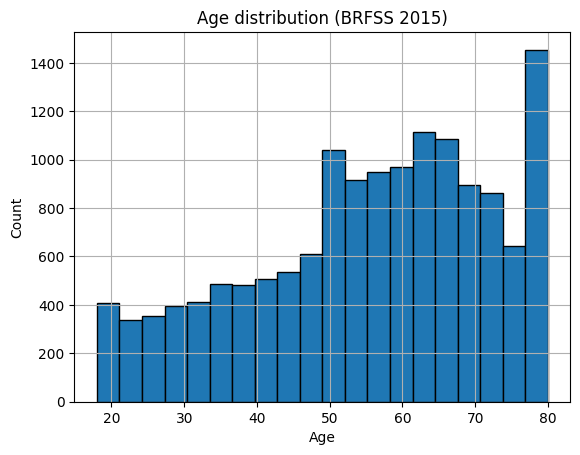

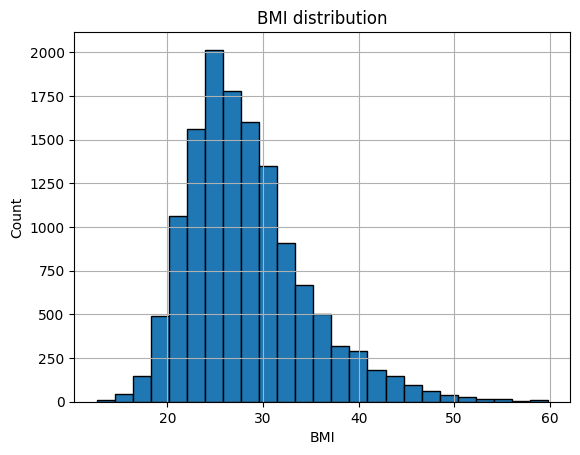

In [ ]:
# =========================
# Step 7 — Quick sanity checks
# =========================

print("\nAge summary (should be adults 18–80):")
print(tidy["age"].describe() if "age" in tidy.columns else "age not present")

print("\nBMI summary:")
print(tidy["BMI"].describe() if "BMI" in tidy.columns else "BMI not present")

print("\nDiabetes target counts:")
if "diabetes_dx" in tidy.columns:
    print(tidy["diabetes_dx"].value_counts(dropna=False))
else:
    print("diabetes_dx not present")

# Plot quick histograms (optional)
if "age" in tidy.columns:
    tidy["age"].dropna().hist(bins=20, edgecolor="k")
    plt.title("Age distribution (BRFSS 2015)")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

if "BMI" in tidy.columns:
    tidy["BMI"].dropna().hist(bins=25, edgecolor="k")
    plt.title("BMI distribution")
    plt.xlabel("BMI")
    plt.ylabel("Count")
    plt.show()


In [ ]:
# =========================
# Step 8 — Build a modeling-ready dataframe
#   Drop rows with missing target (diabetes_dx) and key predictors.
#   Keep this lean; you can expand later.
# =========================
model_features = [
    "age", "sex", "education", "income", "employment",
    "BMI", "any_exercise", "current_smoker", "any_alcohol",
    "ever_high_bp", "ever_high_chol"
]
model_cols = [c for c in model_features if c in tidy.columns] + ["diabetes_dx"]

model_df = tidy[model_cols].copy()

# Encode simple categoricals now or later in pipeline; here we keep them as text.
before = model_df.shape[0]
model_df = model_df.dropna(subset=["diabetes_dx"])  # must know the label
after = model_df.shape[0]
print(f"Dropped {before - after} rows with missing diabetes_dx. Remaining: {after}")

# Optional: drop rows missing *too many* key predictors (tune threshold)
predictor_na = model_df[model_features].isna().sum(axis=1)
model_df = model_df.loc[predictor_na <= 3].reset_index(drop=True)
print("Model df:", model_df.shape)
model_df.head(5)


Dropped 383 rows with missing diabetes_dx. Remaining: 14077
Model df: (13145, 12)


,age,sex,education,income,employment,BMI,any_exercise,current_smoker,any_alcohol,ever_high_bp,ever_high_chol,diabetes_dx
0,63.0,Female,HS/GED,$15–20k,NaN,40.18,0.0,0.0,0.0,1.0,1.0,0.0
1,52.0,Female,College 4+,<$10k,Out of work >1y,25.09,1.0,1.0,0.0,0.0,0.0,0.0
2,63.0,Female,HS/GED,NaN,NaN,28.19,0.0,NaN,0.0,1.0,1.0,0.0
3,61.0,Female,Some college,NaN,NaN,24.37,0.0,NaN,0.0,0.0,0.0,0.0
4,73.0,Female,Grades 9-11,$35–50k,Self-emp,26.52,1.0,NaN,0.0,1.0,0.0,0.0


In [ ]:
# =========================
# Step 9 — Save cleaned outputs
# =========================
tidy.to_parquet("brfss2015_tidy.parquet", index=False)
tidy.to_csv("brfss2015_tidy.csv", index=False)

model_df.to_parquet("brfss2015_model_ready.parquet", index=False)
model_df.to_csv("brfss2015_model_ready.csv", index=False)

print("✅ Saved: brfss2015_tidy.(csv|parquet) and brfss2015_model_ready.(csv|parquet)")


✅ Saved: brfss2015_tidy.(csv|parquet) and brfss2015_model_ready.(csv|parquet)
